<a href="https://colab.research.google.com/github/maskeenK/Customer-Polarity-Classification-in-Online-Food-Delivery/blob/main/ML_Customer_Polarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv')
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


In [ ]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [ ]:
data.isnull().sum()

Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua

In [ ]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [ ]:
import scipy.stats as st 

# Correlation values for variables more than a threshold of 0.4
corr=[]
for i in data.columns:
    if i not in  ['latitude','longitude','Pin code','Output','Reviews']:
        df=pd.crosstab(data['Output'],data[i])
        stat, p, dof, expected = st.chi2_contingency(df,correction=True)
        t=min(df.shape)-1
        deno=sum(df.sum())*t
        x=np.sqrt(stat / deno)
        if(x>0.4): #thresold
             corr.append((i,x))
corr

[('Age', 0.41916612670006054),
 ('Ease and convenient', 0.6944483749782563),
 ('Time saving', 0.6333333550979008),
 ('More restaurant choices', 0.5897138785369491),
 ('Easy Payment option', 0.5571767618313485),
 ('More Offers and Discount', 0.5564505912203883),
 ('Good Food quality', 0.4243449172824401),
 ('Good Tracking system', 0.41749280981704445),
 ('Unaffordable', 0.40917014994986045),
 ('Maximum wait time', 0.4135981980209824)]

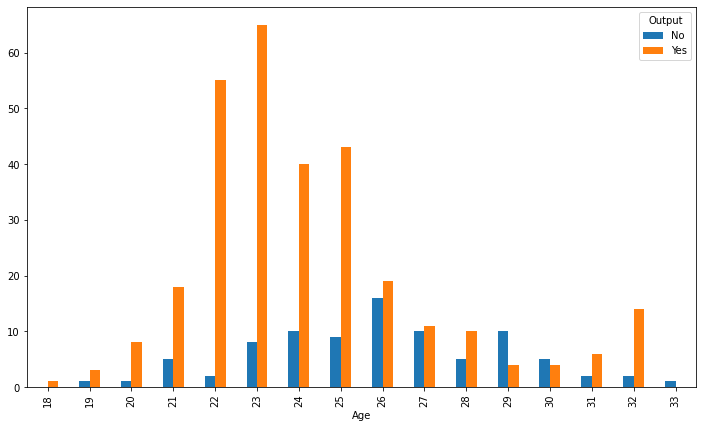

In [ ]:
ax = data.groupby(['Age']).Output.value_counts().reset_index(name='counts').pivot(index='Age', columns='Output', values='counts').plot(kind='bar', figsize = (12,7))

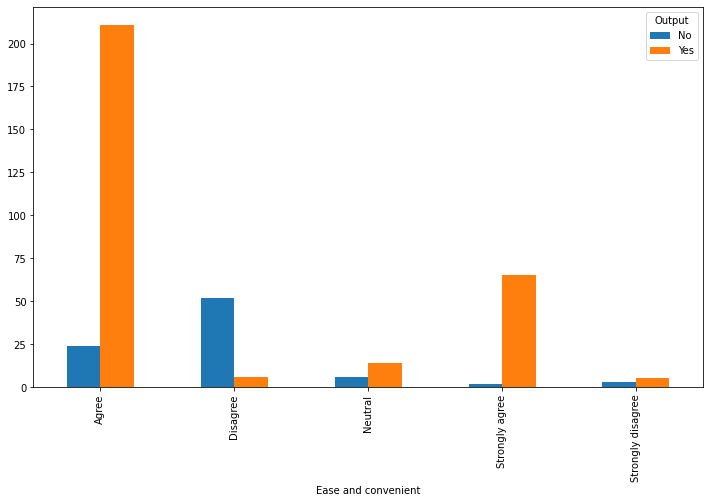

In [ ]:
ax = data.groupby(['Ease and convenient']).Output.value_counts().reset_index(name='counts').pivot(index='Ease and convenient', columns='Output', values='counts').plot(kind='bar', 
                                                                                                                                                                    figsize = (12,7))

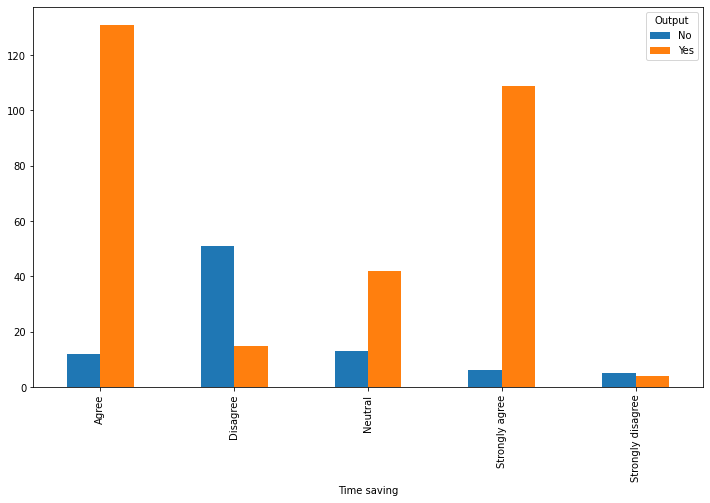

In [ ]:
ax = data.groupby(['Time saving']).Output.value_counts().reset_index(name='counts').pivot(index='Time saving', columns='Output', values='counts').plot(kind='bar', figsize = (12,7))

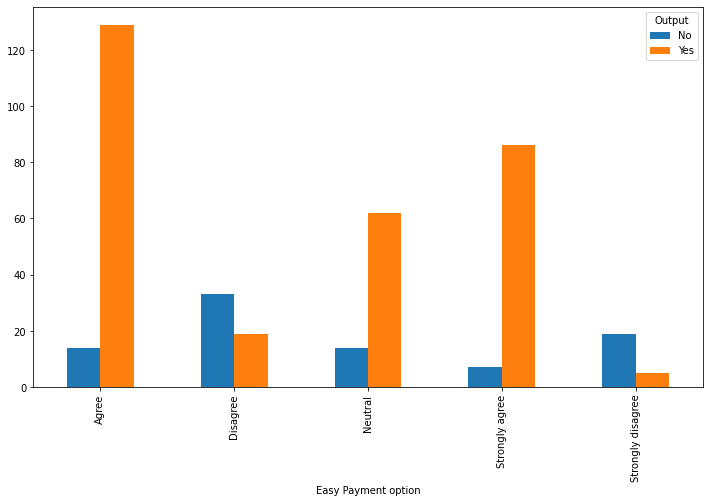

In [ ]:
ax = data.groupby(['Easy Payment option']).Output.value_counts().reset_index(name='counts').pivot(index='Easy Payment option', columns='Output', values='counts').plot(kind='bar', figsize = (12,7))

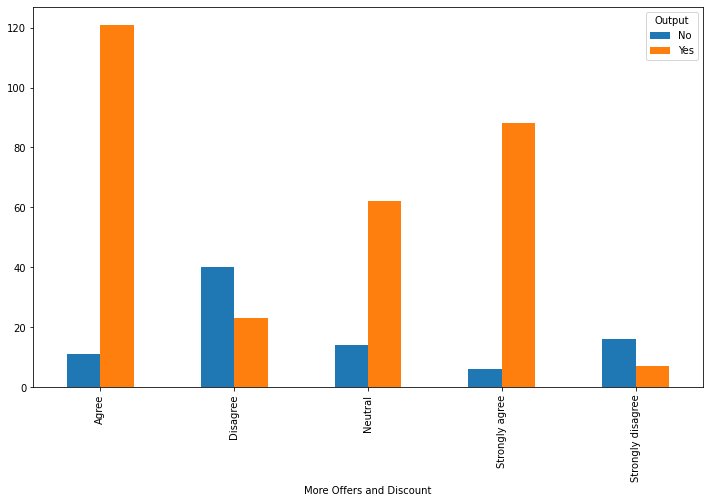

In [ ]:
ax = data.groupby(['More Offers and Discount']).Output.value_counts().reset_index(name='counts').pivot(index='More Offers and Discount', columns='Output', values='counts').plot(kind='bar', 
                                                                                                                                                                                 figsize = (12,7))

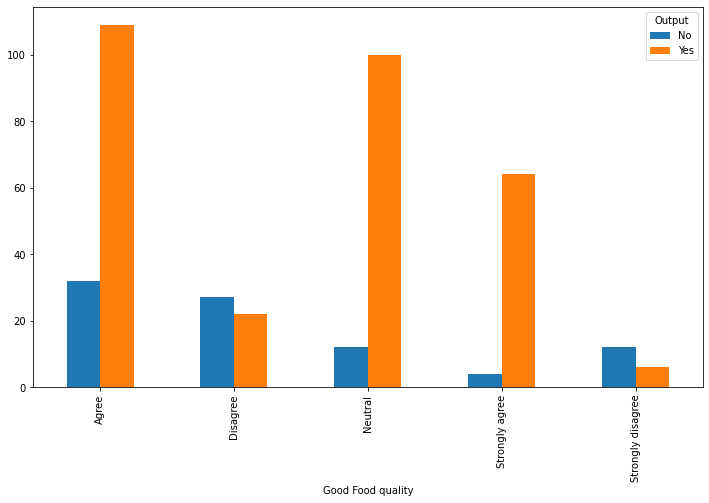

In [ ]:
ax = data.groupby(['Good Food quality']).Output.value_counts().reset_index(name='counts').pivot(index='Good Food quality', columns='Output', values='counts').plot(kind='bar', figsize = (12,7))

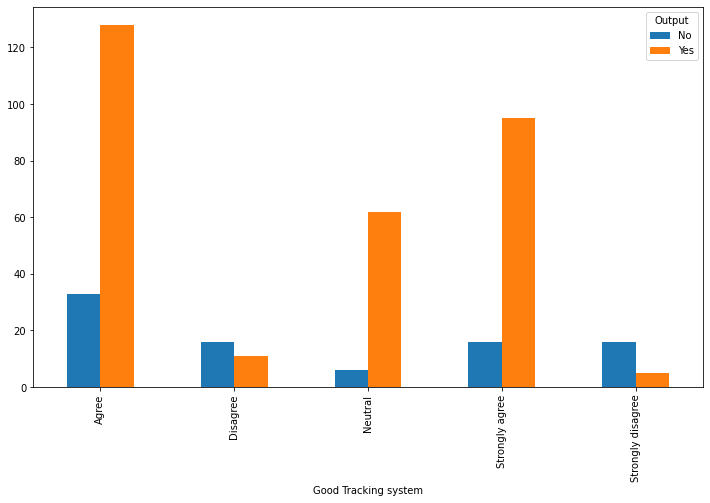

In [ ]:
ax = data.groupby(['Good Tracking system']).Output.value_counts().reset_index(name='counts').pivot(index='Good Tracking system', columns='Output', values='counts').plot(kind='bar', figsize = (12,7))

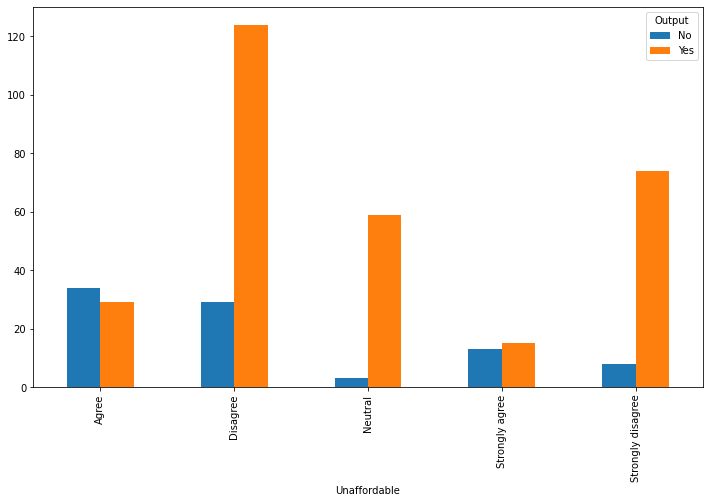

In [ ]:
ax = data.groupby(['Unaffordable']).Output.value_counts().reset_index(name='counts').pivot(index='Unaffordable', columns='Output', values='counts').plot(kind='bar', figsize = (12,7))

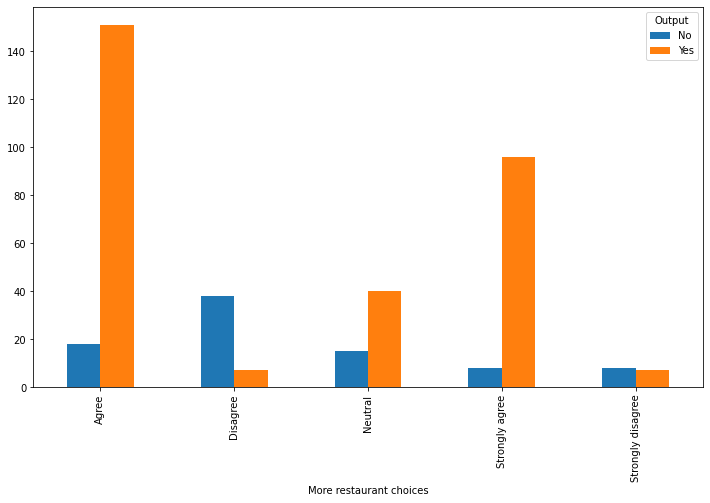

In [ ]:
ax = data.groupby(['More restaurant choices']).Output.value_counts().reset_index(name='counts').pivot(index='More restaurant choices', columns='Output', 
                                                                                                      values='counts').plot(kind='bar', figsize = (12,7))
                                                                                                                                                      

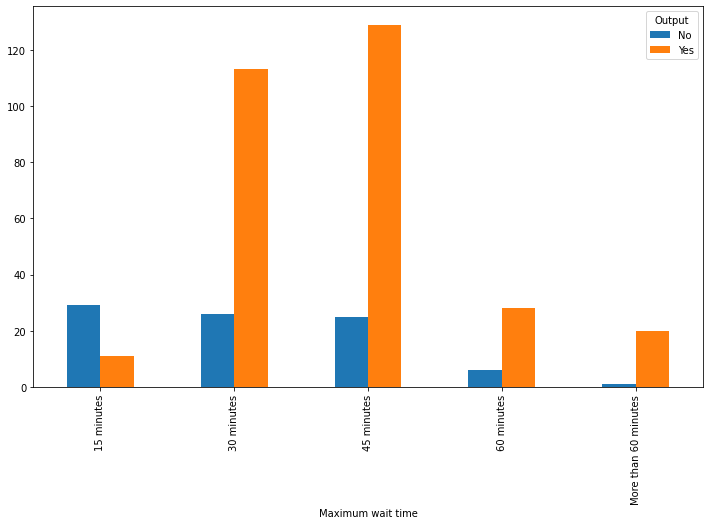

In [ ]:
ax = data.groupby(['Maximum wait time']).Output.value_counts().reset_index(name='counts').pivot(index='Maximum wait time', columns='Output', values='counts').plot(kind='bar', figsize = (12,7))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Creating a class for grouping categorical variables into frequency tables
class CategoricalGrouping():
    
    def __init__(self, data, col1, col2):
        self.data = data  # Pandas dataframe
        self.col1 = col1  # Column with categories for analysis
        self.col2 = col2  # Output variable
        
    @property
    def table(self):
        return self.data.groupby([self.col1, self.col2]).size().reset_index().pivot(
            columns=self.col1, index=self.col2, values=0).fillna(0)
            
# Defining a function to plot a nested pie chart
def nested_piechart(data, axis, wedge_width, pie_colors, chart_title):

    # Outer wedges
    wedges_outer, texts_outer = axis.pie(data.iloc[1], radius=1, wedgeprops=dict(width=wedge_width, edgecolor='w'), 
           startangle=90, colors=pie_colors)

    # Inner wedges
    axis.pie(data.iloc[0], radius=(1-wedge_width), wedgeprops=dict(width=wedge_width, edgecolor='w', alpha=0.7), 
           startangle=90, colors=pie_colors)

    axis.set(aspect="equal", title=chart_title)
    axis.legend(wedges_outer, list(data.columns), title=chart_title, loc="lower center", bbox_to_anchor=(0.85, -0.1, 0.5, 1))

    # Defining properties for annotations
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),  bbox=bbox_props, zorder=0, va="center")

    y = np.sin(np.deg2rad(120))  # Converting degrees to radians
    x = np.cos(np.deg2rad(120))  # Converting degrees to radians

    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]  # Depending on the radians of x, will give -1 or 1
    connectionstyle = "angle,angleA=0,angleB={}".format(120)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})  # adding connection style args to kw dict
    axis.annotate(data.index[1], xy=(x, y), xytext=(1*np.sign(x), 1.2*y), 
                horizontalalignment=horizontalalignment, **kw)

    y = np.sin(np.deg2rad(140)) - 0.60  # Converting degrees to radians
    x = np.cos(np.deg2rad(140)) + 0.37  # Converting degrees to radians

    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]  # Depending on the radians of x, will give -1 or 1
    connectionstyle = "angle,angleA=0,angleB={}".format(140)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})  # adding connection style args to kw dict
    axis.annotate(data.index[0], xy=(x, y), xytext=(0.01*np.sign(x), -2*y), 
                horizontalalignment=horizontalalignment, **kw)

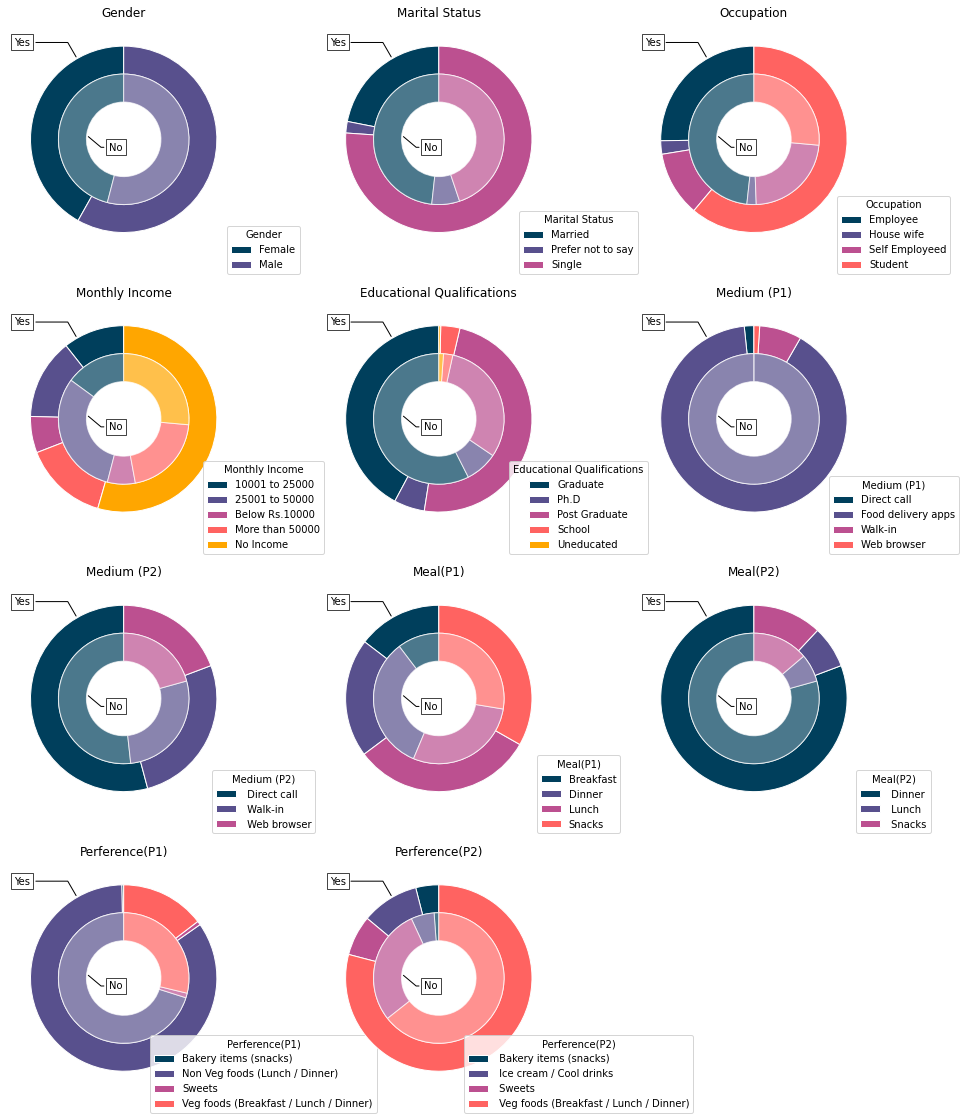

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=[16,30])
size = 0.3
c2 = 'Output'
c_palette = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
cat_var = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Medium (P1)', 
           'Medium (P2)', 'Meal(P1)', 'Meal(P2)', 'Perference(P1)', 'Perference(P2)']
ax_list = []
for ind, var in enumerate(cat_var):
    ax_list.append(fig.add_subplot(6, 3, (ind+1)))
    nested_piechart(CategoricalGrouping(data, var, c2).table, ax_list[ind], size, c_palette, var)

In [ ]:
import folium

In [ ]:
%matplotlib inline

x = data.groupby(['latitude', 'longitude', 'Pin code']).size().reset_index()
x.columns = ['latitude', 'longitude', 'pincode', 'frequency']
x.sort_values(by=['frequency'], ascending=False, inplace=True)

latitude = 12.972442
longitude = 77.580643
delivery_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lon, freq, pin in zip(x['latitude'], x['longitude'], x['frequency'], x['pincode']):
    folium.CircleMarker([lat, lon], radius=freq, 
                        popup = ('Pincode: ' + str(pin) + '<br>' 
                                 '# of customers: ' + str(freq)
                                ), 
                        tooltip='Click to expand',
                        color='b', 
                        fill_color='red', 
                        fill=True, 
                        fill_opacity=0.6).add_to(delivery_map)

In [ ]:
delivery_map

In [ ]:
data.columns
dropCol = ['latitude', 'longitude','Educational Qualifications','Pin code','Reviews']
data.drop(dropCol, axis = 1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Label Encoding

data.columns
colsEnc = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Medium (P1)', 'Medium (P2)', 
           'Meal(P1)', 'Meal(P2)', 'Perference(P1)', 'Perference(P2)', 'Ease and convenient', 
           'Time saving', 'More restaurant choices', 'Easy Payment option', 'More Offers and Discount', 
           'Good Food quality', 'Good Tracking system', 'Self Cooking', 'Health Concern', 
           'Late Delivery', 'Poor Hygiene', 'Bad past experience', 'Unavailability', 'Unaffordable', 
           'Long delivery time', 'Delay of delivery person getting assigned',
           'Delay of delivery person picking up food', 'Wrong order delivered',
           'Missing item', 'Order placed by mistake', 'Influence of time', 'Order Time', 'Maximum wait time', 
           'Residence in busy location', 'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time', 
           'Delivery person ability', 'Influence of rating', 'Less Delivery time','High Quality of package', 
           'Number of calls', 'Politeness', 'Freshness ', 'Temperature', 'Good Taste ', 'Good Quantity', 'Output']

from sklearn.preprocessing import LabelEncoder

data[colsEnc] = data[colsEnc].apply(LabelEncoder().fit_transform)

In [ ]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Family size,Medium (P1),Medium (P2),Meal(P1),Meal(P2),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,0,2,3,4,4,1,2,0,1,...,2,1,1,1,1,1,1,1,1,1
1,24,0,2,3,2,3,1,2,3,0,...,2,4,4,4,4,4,4,4,4,1
2,22,1,2,3,2,3,1,0,2,2,...,2,0,4,1,4,4,0,4,1,1
3,22,0,2,3,4,6,1,1,3,0,...,2,4,0,1,4,4,4,4,0,1
4,22,1,2,3,2,4,2,0,2,0,...,2,0,0,1,0,0,0,4,4,1


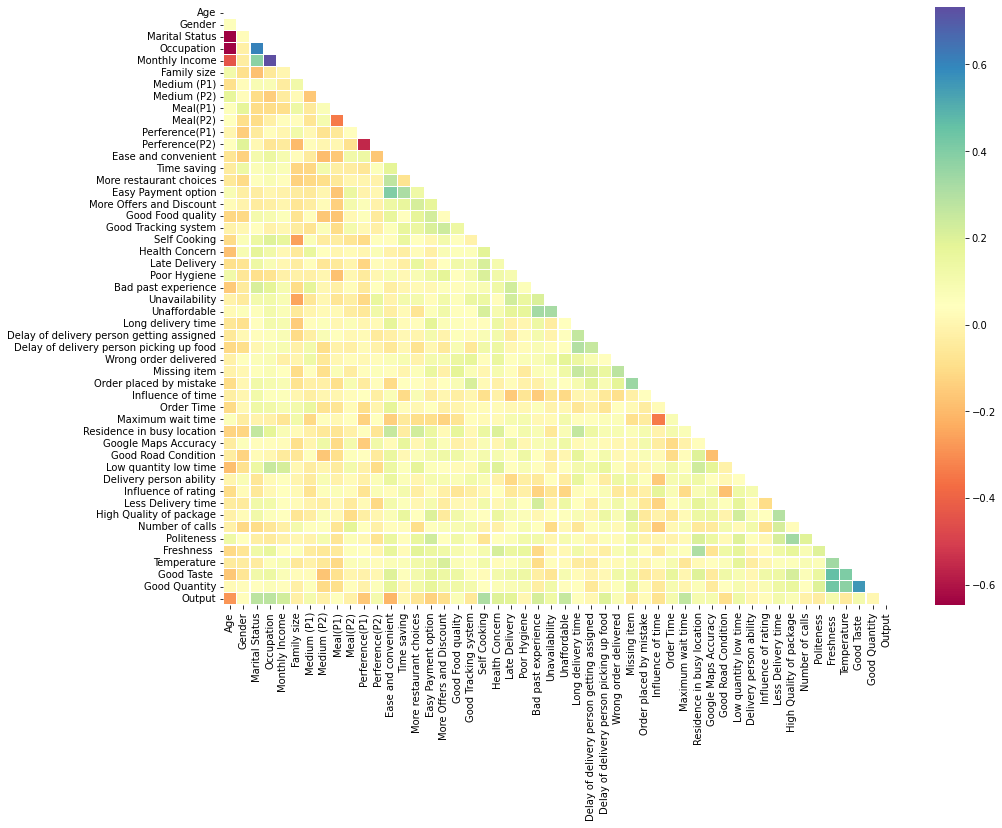

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[15, 11])
sns.heatmap(data.corr(method='spearman'), annot=False, mask=np.triu(data.corr(method='spearman')), cmap='Spectral',
            linewidths=0.1, linecolor='white')


In [ ]:
data.shape

(388, 50)

In [ ]:
X = data.iloc[:, 0:49]
y = data['Output']

In [ ]:
# Splitting the examples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=8, p=1)
knn_best.fit(X_train,y_train.values.ravel())
y_pred = knn_best.predict(X_test)
obs = y_test

In [ ]:
# import the metrics class
from sklearn import metrics
from sklearn.metrics import accuracy_score
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Reference   0   1
Prediction       
0           9   1
1           3  65

Accuracy Score : 0.9487179487179487

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.96      0.98      0.97        66

    accuracy                           0.95        78
   macro avg       0.93      0.87      0.89        78
weighted avg       0.95      0.95      0.95        78




Text(0.5, 257.44, 'Predicted label')

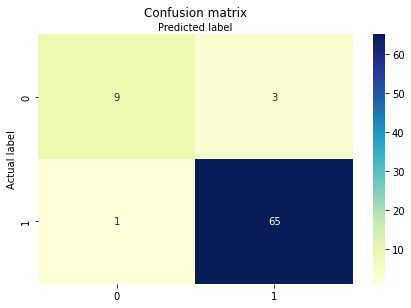

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Prediction'], colnames=['Reference'])
print(confusion_matrix, end='\n\n')
print('Accuracy Score :',accuracy_score(y_test, y_pred), end='\n\n')
print(classification_report(y_test, y_pred), end='\n\n')

# Confusion Matrix in heatmap format
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

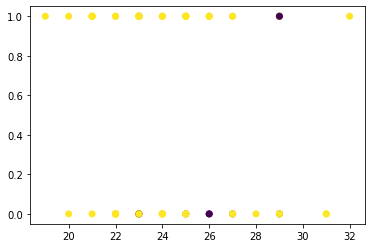

In [ ]:
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_pred)

Support Vector Machines

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [ ]:
svm_best = svm.SVC(C=5, kernel='rbf')
svm_best.fit(X_train,y_train.values.ravel())
y_pred = svm_best.predict(X_test)

In [ ]:
# Get support vector indices
support_vector_indices = svm_best.support_
print(support_vector_indices)

[  7   9  11  22  24  29  32  33  38  41  44  49  50  51  55  57  58  65
  79  80  89  95  98  99 100 107 113 125 126 128 132 135 138 143 145 147
 152 160 161 162 166 168 181 190 191 194 196 201 218 232 237 241 243 244
 246 247 254 255 260 261 263 269 277 280 281 288 290 296 304 305 306   2
   3   4   5   6  14  15  16  18  19  20  23  25  27  28  34  42  45  48
  52  61  62  63  73  76  82  83  85  86  87  88  90  93  94  96 102 103
 104 108 109 110 112 117 121 122 123 129 134 136 137 139 140 148 150 151
 153 154 155 156 158 163 164 171 176 178 179 184 187 189 199 202 207 208
 212 214 215 216 220 224 226 227 228 229 231 238 240 245 250 251 256 257
 262 267 272 274 284 286 289 297 307 309]


In [ ]:
# Get number of support vectors per class
support_vectors_per_class = svm_best.n_support_
print(support_vectors_per_class)

[ 71 101]


Reference   0   1
Prediction       
0           8   1
1           4  65

Accuracy Score : 0.9358974358974359

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.94      0.98      0.96        66

    accuracy                           0.94        78
   macro avg       0.92      0.83      0.86        78
weighted avg       0.93      0.94      0.93        78




Text(0.5, 257.44, 'Predicted label')

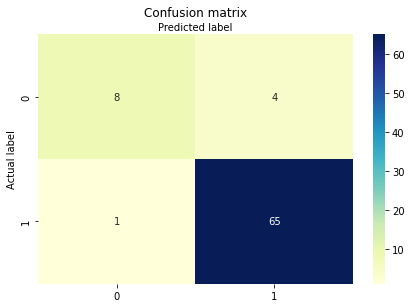

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Prediction'], colnames=['Reference'])
print(confusion_matrix, end='\n\n')
print('Accuracy Score :',accuracy_score(y_test, y_pred), end='\n\n')
print(classification_report(y_test, y_pred), end='\n\n')

# Confusion Matrix in heatmap format
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Enhanced KNN

In [ ]:
def distance(A,B):
    difference = (A-B)**2
    return np.sqrt(difference.sum())     

In [ ]:
def get_closest_label(D,k):
    k_neighbors=D[:k]
    if k == 1:
        return D[0][0]
    else :
        f1=0
        f2=0
        f3=0
        for j in range(k):
            if(k_neighbors[j][1]==0):
                    f1+=1
            elif(k_neighbors[j][1]==1):
                    f2+=1
            else:
                f3+=1;
            if (f1> f2) & (f1>f3):
                most_frequent_label=0
            elif (f2>f1) & (f2>f3):
                most_frequent_label=1
            else:
                most_frequent_label=2
    return most_frequent_label

In [ ]:
def predict(X_train,X_test,y_train,k):
    train_rows,train_columns = X_train.shape
    test_rows,test_columns = X_test.shape
    predicted_labels = np.empty(shape=[0,X_test.shape[0]])
    for i in range(test_rows):
        distance_array = []
        for j in range(train_rows):
            #distance_array.append((distance(X_test[i], X_train[j]), y_train[j]))
            distance_array.append((distance(X_test.iloc[i], X_train.iloc[j]), y_train.iloc[j]))
        distance_array = sorted(distance_array, key=lambda x: (x[0]))
        predicted_labels=np.append(predicted_labels,get_closest_label(distance_array,k))
    return predicted_labels   

In [ ]:
def accuracy(actual_y,predicted_y):
    correct_prediction=0
    for i in range(np.size(actual_y)):
        if(actual_y[i]==predicted_y[i]):
            correct_prediction+=1
    total_prediction=np.size(actual_y)
    accuracy=((correct_prediction/total_prediction)*100)
    return accuracy  

In [ ]:
result=predict(X_train,X_test,y_train,2)
print("accuracy for basic knn is:",accuracy(y_test.to_numpy(),result),"%")

accuracy for basic knn is: 80.76923076923077 %


inverse distance weighted voting

In [ ]:
def weighted_voting(D,k):
    weights = np.zeros(k)
    sums=0
    for i in range(k):
        weights[i] += 1.0 / D[i][0]
        if np.isinf(weights[i]):
            weights[i]=0
        else:
            weights[i]= float(weights[i])
        sums += weights[i]
    weights /= sums
    return weights

In [ ]:
def votes(D,w,k):
    votes = np.zeros(3, dtype=np.float32)
    k_neighbor= D[:k]
    for i in range(k):
        predc = k_neighbor[i][1]
        votes[predc] += w[i] * 1.0
    return  np.argmax(votes)

In [ ]:
def predict_extension(X_train,X_test,y_train,k):
    test_rows,test_columns = X_test.shape
    train_rows,train_columns = X_train.shape
    predicted_labels = np.empty(shape=[0,X_test.shape[0]])
    for i in range(test_rows):
        distance_array = []
        for j in range(train_rows):
            distance_array.append((distance(X_test.iloc[i], X_train.iloc[j]), y_train.iloc[j]))
        distance_array = sorted(distance_array, key=lambda x: (x[0]))
        weights = weighted_voting(distance_array,k)
        label = votes(distance_array,weights,k)
        predicted_labels=np.append(predicted_labels,label)
    return predicted_labels

In [ ]:
result=predict_extension(X_train,X_test,y_train,2)
print("accuracy for knn with weighted inverse is:",accuracy(y_test.to_numpy(),result),"%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


accuracy for knn with weighted inverse is: 83.33333333333334 %
